In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,622 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
!pip install requests
!pip install BeautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 로또 분석

https://dhlottery.co.kr/common.do?method=main

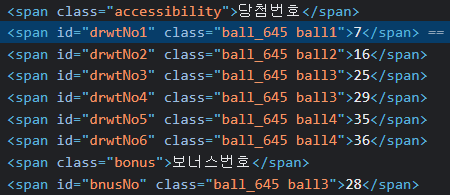

site의 데이터 형국 보고 어떻게 추출할지 빠르게 결정하는 것이 크롤링의 경력이자 실력

많이 경험할 수록 데이터 빨리 수집할 수 있음

In [ ]:
import requests # https://www.daleseo.com/python-requests/
from bs4 import BeautifulSoup as bs # bs4 패키지지 내에는 수많은 클래스가 존재하는데, 그 클래스 중 BeautifulSoup을 꺼내 사용하겠다고 명시적으로 표시하는 것

res = requests.get('https://dhlottery.co.kr/common.do?method=main') # 통신통해 얻어온 결과를 res 변수에 저장

In [ ]:
res # Response [200] : 통신 요청을 잘 받았음을 의미

<Response [200]>

In [ ]:
res.content # 눈에 들어오지 않는 태그 형태로 출력됨, 따라서 beautifulsoup을 통해 파싱하는 과정 필요요

In [ ]:
soup = bs(res.content, 'html.parser') # html 형태로 파싱함
result = soup.select('.ball_645') # list 형태의 데이터 출력됨, class가 ball 645인 데이터들을 추출

num_list = []
for num in result:
  num_list.append(int(num.text))

print(num_list)

[7, 16, 25, 29, 35, 36, 28]


# Pandas Series -> Bar() 시각화

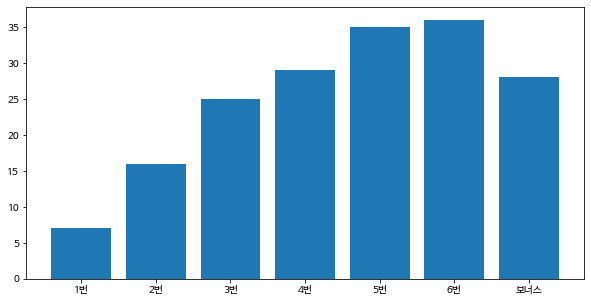

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.Series(num_list)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

index = [str(i+1)+'번' for i in range(len(df.index)-1)]
index.append('보너스')
ax.bar(index,df)
plt.rc('font', family='NanumBarunGothic') 
plt.show()


# 네이버 뉴스 크롤링

그 날 뉴스 데이터 수집해서 분석하여 주식 자동매매하는 프로그램 작성

newspaper는 사용자가 지정한 url에서 text 추출해주는 모듈

In [ ]:
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 25.5 MB/s 
     |████████████████████████████████| 93 kB 2.6 MB/s 
     |████████████████████████████████| 81 kB 10.8 MB/s 
     |████████████████████████████████| 7.4 MB 72.4 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=f4661d15eef2f3c6e3d4bb60731733ac86f0045d857464bc48e0a5e14772a211
  Stored in directory: /root/.cache/pip/wheels/99/74/83/8fac1c8d9c648cfabebbbffe97a889f6624817f3aa0bbe6c09
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3354 sha256=e618aaa36f7082d0b3b381625feffd5f81ec01d44433616989ac1963579c7a7e
  Stored in directory: /root/.cache/pip/wheels/b6/09/68/a9f15498ac02c23dde29f18745bc6a6f574ba4ab41861a3575
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398405 sha256=753441e2a48787b92e4304941fcf4c8a4134c83af7f9dc2

In [ ]:
# !pip install newspaper3k	# newspaper3k 패키지 설치
from newspaper import Article	# newspaper패키지의 Article모듈 임포트
import newspaper as news

link = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105'
article = news.Article(link,language='ko')
article.download()
article.parse()
print(article.text)

OTT 서비스 넷플릭스가 새로 도입한 광고요금제에 대한 신규 가입률이 9%에 불과한 것으로 집계됐다. 업계에서는 ‘기대에 못 미치는 흥행결과’라는 평가가 …

문화일보


In [ ]:
# 파싱할 뉴스 기사 주소
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'
article = Article(url, language='ko')	# 한국어이므로 language='ko'설정
article.download() #해당 뉴스 다운로드
article.parse() #뉴스 제목과 본문을 찾아내는 분석 진행!

In [ ]:
page_num = 1
code = 105
date = 20221221

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1='+str(code)
# 숫자는 문자열과 더할 수 없으므로 str으로 변환 후 이어붙여준다.

In [ ]:
url

'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105'

In [ ]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'}
news = requests.get(url, headers=headers)	# 유저정보를 requests.get시 포함.
# news.content

In [ ]:
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'}
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url, headers=headers)
    soup = bs(news.content, 'html.parser')
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [ ]:
url_list = make_urllist(1,105,20221221)
print('뉴스 기사의 총 url 갯수 :',len(url_list))
url_list[:5]

뉴스 기사의 총 url 갯수 : 20


['https://n.news.naver.com/mnews/article/021/0002547527?sid=105',
 'https://n.news.naver.com/mnews/article/020/0003469325?sid=105',
 'https://n.news.naver.com/mnews/article/001/0013654214?sid=105',
 'https://n.news.naver.com/mnews/article/018/0005391399?sid=105',
 'https://n.news.naver.com/mnews/article/009/0005063343?sid=105']

In [ ]:
def make_data(urllist):
  text_list = []
  title_list = []
  for url in urllist:
    article = Article(url,language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)
    title_list.append(article.title)

  df = pd.DataFrame({'contents':text_list,'title':title_list})
  return df

data = make_data(url_list)
data

,contents,title
0,삼성전자가 업계 최초로 12나노(㎚·10억 분의 1m)급 D램(사진)을 개발하는 데...,"처리속도 2배 향상… 삼성전자, 12나노급 D램 첫 개발"
1,20년 동안 담배를 피운 A 씨(38)는 그동안 수차례 금연을 시도했지만 3일을 넘...,“‘공짜’ 상담 받으며 어느덧 금연 6개월차”… 타인 도움 받으면 금연 성공률 최대...
2,\n\n[오늘의집 제공. 재판매 및 DB 금지] [오늘의집 제공. 재판매 및 DB ...,"오늘의집, 뉴스룸 개설…피쳐·프레스·아카이브 콘텐츠 제공"
3,[이데일리 김현아 기자]TV 대신 네이버로 월드컵 경기를 보는 일이 익숙해지고 있다...,TV대신 네이버로…카타르 월드컵 누적 시청자 1억 2117만명
4,조이시티(대표 조성원)는 크리스마스를 맞아 게임 6종에서 이벤트를 실시한다고 21일...,"조이시티, 크리스마스 이벤트 게임 6종서 진행"
5,[OSEN=임재형 기자] 스마일게이트 스토브가 우수한 인디 게임을 선정하는 ‘스토브...,"스마일게이트, ‘2022 스토브인디 어워즈’ 수상작 공개"
6,SK텔레콤은 고객들의 생활에 꼭 필요해 반복적으로 구매하는 상품들을 정기 배송하는 ...,"SK텔레콤, 우유 등 ‘정기배송 서비스’ 출시"
7,TDI(티디아이)가 분석 플랫폼 데이터드래곤을 통해 올해 에이블리 앱 설치수와 설치...,"TDI, 에이블리 앱 설치수와 설치수 대비 사용자수 분석"
8,"[데일리안 = 안순혁 기자]""소방 대표로 남극에 가야 한다면 제가 직접 경험하고 싶...","'남극에 간 구급대원'...""안전! 그 곳에서도 꼭 필요하다"""
9,\n\n[네이버 제공. 재판매 및 DB 금지] [네이버 제공. 재판매 및 DB 금지...,"네이버, 웹툰·제페토·밴드 등서 다양한 연말 이벤트"


# 시각화

In [ ]:
# hist() 함수
mean = 172
sigma = 10
x = np.random.normal(172,10,250)
print(x[:10])
print(len(x))

[177.750177   178.97484095 176.27312593 169.59784932 172.98546718
 178.5180416  152.50464172 166.26058167 193.32777781 172.59937676]
250


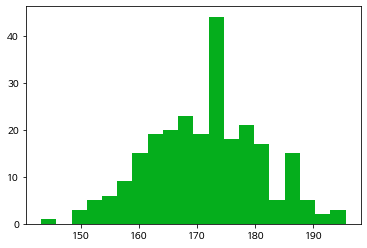

In [ ]:
plt.hist(x, bins=20, color='#05ae1c')
plt.show()

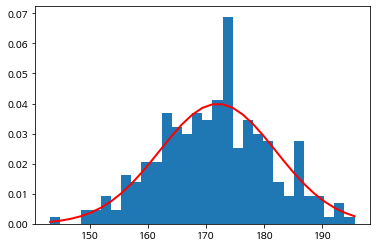

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# 막대그래프 함께 출력

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/sample/anime_genre_top10_pivoted.csv',index_col='genre')

df.head()


,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0


In [ ]:
df # 각 데이터를 그룹별로 묶어서 각 데이터를 한꺼번에 보고자 함함

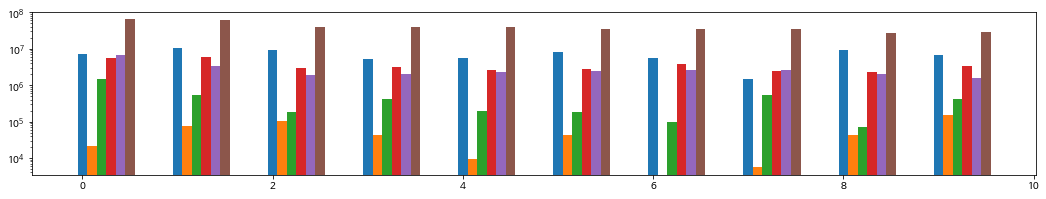

In [ ]:
import numpy as np

plt.rc('font', family='NanumBarunGothic') 
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)
wt = np.array(range(len(df)))
w = 0.1

for i in df.columns:
  ax.bar(wt,df[i],width=w,label=i)
  wt = wt + w
ax.set_yscale('log') # 윗 부분 잘린 데이터 삭제, log scale로 출력력
plt.show()

# Matplotlib 히스토그램

In [ ]:
csv = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/sample/anime_master.csv'

df = pd.read_csv(csv)
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
10070,11095,Zouressha ga Yatte Kita,Adventure,Movie,1,6.06,78
10071,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172
10072,28543,Zukkoke Sannin-gumi no Hi Asobi Boushi Daisakusen,"Drama, Kids",OVA,1,5.83,50
10073,18967,Zukkoke Sannin-gumi: Zukkoke Jikuu Bouken,"Comedy, Historical, Sci-Fi",OVA,1,6.13,76


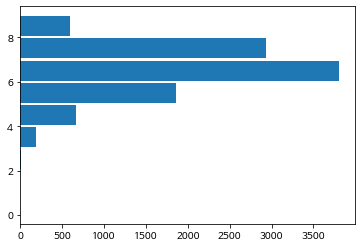

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['rating'],range(0,10),rwidth=0.9, orientation='horizontal')
plt.show()

# 데이터 시각화 - Folium

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
seoul_map = folium.Map(location=[37.4919157,126.9261711],zoom_start=15,tiles='Stamen Terrain')
# seoul_map.save('./seoul.html')
seoul_map

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/서울지역 대학교 위치.xlsx',index_col='Unnamed: 0')
df.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [ ]:
seoul_map = folium.Map(location=[37.4919157,126.9261711],tiles='Stamen Terrain',
                       zoom_state=12)

for name,lat,lng in zip(df.index,df.위도,df.경도):
  folium.Marker([lat,lng],popup=name).add_to(seoul_map)

seoul_map

In [ ]:
# marking 다르게
seoul_map = folium.Map(location=[37.4919157,126.9261711],tiles='Stamen Terrain',
                       zoom_state=12)

for name,lat,lng in zip(df.index,df.위도,df.경도):
  folium.CircleMarker([lat,lng],
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color='coral',
                      fill_opacity=0.7,
                      popup=name).add_to(seoul_map)

seoul_map


In [ ]:

import pandas as pd
import folium
import json
csv_path = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/경기도인구데이터.xlsx'

df = pd.read_excel(csv_path, index_col='구분', engine= 'openpyxl')
# df.columns = df.columns.map(str)

csv_path = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/경기도인구데이터.xlsx'
geo_path = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path,encoding='utf-8-sig'))

g_map = folium.Map(location=[37.4919157,126.9261711],tiles='Stamen Terrain',
                       zoom_state=12)
year = 2017
# year = '2017'

# folium.Choropleth(geo_data=geo_data,
#                   data = df[year],
#                   columns=[df.index,df[year]],
#                   fill_color='YlOrRd',
#                   fill_opacity=0.7,
#                   line_opacity=0.3).add_to(g_map)
folium.Choropleth(geo_data=geo_data, # 지도 경계
                  data = df[year], # 표시하려는 데이터
                  columns = [df.index, df[year]], # 열 지정
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name',
                  ).add_to(g_map)
g_map

### 지도에 공공 데이터 올리기

In [ ]:
import folium

dir = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/골목상권현황.csv'
df = pd.read_csv(dir, encoding='cp949',index_col="상권명")


,다중지역정보,업종정보,점포수,위도,경도
상권명,,,,,
진안중학교,"{""type"":""Polygon"",""coordinates"":[[[127.0388619...",한식 일반 음식점업/두발 미용업/체인화 편의점/한식 육류 요리 전문점/부동산 중개 ...,33,37.217036,127.038007
부곡중앙로,"{""type"":""Polygon"",""coordinates"":[[[126.9552578...",한식 일반 음식점업/커피 전문점/일반 교과학원/슈퍼마켓/한식 육류 요리 전문점/셔츠...,35,37.320141,126.953726
탑동로,"{""type"":""Polygon"",""coordinates"":[[[126.9738512...",한식 일반 음식점업/노래 연습장 운영업/기타 주점업/한식 육류 요리 전문점/당구장 ...,140,37.270061,126.975103
내리1길,"{""type"":""Polygon"",""coordinates"":[[[127.2251616...",한식 일반 음식점업/체인화 편의점/기타 음ㆍ식료품 위주 종합 소매업/통신기기 소매업...,55,37.000470,127.223239
백옥대로2438번길,"{""type"":""Polygon"",""coordinates"":[[[127.2511119...",자동차 전문 수리업/부동산 중개 및 대리업/한식 일반 음식점업/철물 및 난방용구 소...,17,37.342433,127.251994


In [ ]:
df.업종정보.unique

<bound method Series.unique of 상권명
진안중학교         한식 일반 음식점업/두발 미용업/체인화 편의점/한식 육류 요리 전문점/부동산 중개 ...
부곡중앙로         한식 일반 음식점업/커피 전문점/일반 교과학원/슈퍼마켓/한식 육류 요리 전문점/셔츠...
탑동로           한식 일반 음식점업/노래 연습장 운영업/기타 주점업/한식 육류 요리 전문점/당구장 ...
내리1길          한식 일반 음식점업/체인화 편의점/기타 음ㆍ식료품 위주 종합 소매업/통신기기 소매업...
백옥대로2438번길    자동차 전문 수리업/부동산 중개 및 대리업/한식 일반 음식점업/철물 및 난방용구 소...
                                    ...                        
신천6길          부동산 중개 및 대리업/두발 미용업/커피 전문점/기타 음ㆍ식료품 위주 종합 소매업/...
발안로           한식 육류 요리 전문점/치킨 전문점/한식 일반 음식점업/일반 교과학원/생맥주 전문점...
봉담초등학교        한식 일반 음식점업/두발 미용업/커피 전문점/한식 육류 요리 전문점/부동산 중개 및...
태평2길          한식 일반 음식점업/커피 전문점/한식 육류 요리 전문점/피자  햄버거  샌드위치 및...
중앙지구대         기타 주점업/한식 육류 요리 전문점/한식 면 요리 전문점/일식 음식점업/한식 일반 ...
Name: 업종정보, Length: 828, dtype: object>

# 지하철 1호선 출근시간대 하차 인원 시각화

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [ ]:
dir = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/서울교통공사 2021년 일별 역별 시간대별 승하차인원(1_8호선).csv'
df_subway = pd.read_csv(dir, encoding='cp949',index_col = '연번')
df_subway.head()

,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시 이후,합 계
연번,,,,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,150,서울역,승차,86,111,157,306,333,...,837,796,839,658,579,479,510,445,101,9339
2,2021-01-01,1,150,서울역,하차,85,355,438,592,841,...,781,710,626,437,425,354,307,134,77,9951
3,2021-01-01,1,151,시청,승차,43,45,75,111,95,...,227,233,347,294,186,216,204,110,29,2947
4,2021-01-01,1,151,시청,하차,40,145,176,312,223,...,158,140,152,121,57,54,64,23,17,2700
5,2021-01-01,1,152,종각,승차,49,59,89,126,125,...,513,548,504,572,492,593,513,130,31,5686


In [ ]:
dir = '/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/서울교통공사 2021년 일별 역별 시간대별 승하차인원(1_8호선).csv'
df_subway = pd.read_csv(dir, encoding='cp949',index_col = '연번')

df_subway_line1_0708 = df_subway.loc[(df_subway['날짜']=='2021-01-01') & (df_subway['호선']==1) & (df_subway['구분']=='하차'), ['역명','구분','07시-08시']]
df_subway_line1_0708=df_subway_line1_0708.reset_index()

In [ ]:
df_subway_line2_0708 = df_subway.loc[(df_subway['날짜']=='2021-01-01') & (df_subway['호선']==2) & (df_subway['구분']=='하차'), ['역명','구분','07시-08시']]
df_subway_line2_0708=df_subway_line2_0708.reset_index()

df_subway_line3_0708 = df_subway.loc[(df_subway['날짜']=='2021-01-01') & (df_subway['호선']==3) & (df_subway['구분']=='하차'), ['역명','구분','07시-08시']]
df_subway_line3_0708=df_subway_line3_0708.reset_index()


In [ ]:
#위도, 경도 변환 함수
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = (round(geo.latitude,4),round(geo.longitude,4))

    return crd

crd = geocoding("서울역")

print(crd)

(37.5561, 126.9724)


In [ ]:
pos1 = []

for station in df_subway_line1_0708['역명']:
  if station == '청량리(서울시립대입구)':
    station = '청량리역'
  # print(station)
  # print(geocoding(station))
  # print("")
  lat,lng = geocoding(station)
  pos1.append((lat,lng))

pos1 = pd.DataFrame(pos1,columns=["lat","lng"])

pos1

,lat,lng
0,37.5561,126.9724
1,37.5655,126.9771
2,37.5702,126.9832
3,37.5725,126.9903
4,37.5710,127.0020
5,37.5742,127.0395
6,37.5760,127.0232
7,37.5784,127.0345
8,37.5818,127.0476
9,37.5723,127.0157


In [ ]:
pos2 = []

for station in df_subway_line2_0708['역명']:
  if station == '낙성대(강감찬)':
    station = '낙성대역'
  # print(station)
  # print(geocoding(station))
  # print("")
  lat,lng = geocoding(station)
  pos2.append((lat,lng))

pos2 = pd.DataFrame(pos2,columns=["lat","lng"])




In [ ]:
pos3 = []

for station in df_subway_line3_0708['역명']:
  if station == '청량리(서울시립대입구)':
    station = '청량리역'
  print(station)
  print(geocoding(station))
  print("")
  lat,lng = geocoding(station)
  pos3.append((lat,lng))

pos3 = pd.DataFrame(pos3,columns=["lat","lng"])

지축
(37.6481, 126.9139)

구파발
(37.6369, 126.9188)

연신내
(37.6189, 126.9212)

불광
(37.6109, 126.9296)

녹번
(37.601, 126.9357)

홍제
(37.5887, 126.9443)

무악재
(37.5823, 126.9504)

독립문
(37.5746, 126.9578)

경복궁(정부서울청사)
(37.5758, 126.9736)

안국
(37.5768, 126.9862)

종로3가
(37.5725, 126.9903)

을지로3가
(37.5663, 126.9925)

동대입구
(37.5591, 127.0057)

약수
(37.5549, 127.0104)

금호
(37.548, 127.0159)

옥수
(37.5403, 127.0184)

압구정
(37.5262, 127.0285)

신사
(37.5161, 127.0195)

잠원
(37.5128, 127.0112)

고속터미널
(37.5051, 127.005)

교대(법원.검찰청)
(37.4929, 127.0138)

남부터미널(예술의전당)
(37.485, 127.0163)

양재(서초구청)
(37.4844, 127.0341)

매봉
(37.4871, 127.047)

도곡
(37.4906, 127.0555)

대치
(37.4945, 127.0632)

학여울
(37.4965, 127.0699)

대청
(37.4936, 127.0796)

일원
(37.4837, 127.0844)

수서
(37.4871, 127.1018)

가락시장
(37.4925, 127.1186)

경찰병원
(37.4954, 127.1239)

오금
(37.502, 127.1282)



In [ ]:
# df_subway_line1_0708 pos
df_subway_result1 = pd.concat([df_subway_line1_0708,pos1],axis=1)
df_subway_result1

,연번,역명,구분,07시-08시,lat,lng
0,2,서울역,하차,438,37.5561,126.9724
1,4,시청,하차,176,37.5655,126.9771
2,6,종각,하차,178,37.5702,126.9832
3,8,종로3가,하차,94,37.5725,126.9903
4,10,종로5가,하차,106,37.5710,127.0020
5,12,동대문,하차,70,37.5742,127.0395
6,14,신설동,하차,88,37.5760,127.0232
7,16,제기동,하차,82,37.5784,127.0345
8,18,청량리(서울시립대입구),하차,133,37.5818,127.0476
9,20,동묘앞,하차,62,37.5723,127.0157


In [ ]:
pos2

,lat,lng
0,37.5561,126.9724
1,37.5655,126.9771
2,37.5702,126.9832
3,37.5725,126.9903
4,37.5710,127.0020
5,37.5742,127.0395
6,37.5760,127.0232
7,37.5784,127.0345
8,37.5818,127.0476
9,37.5723,127.0157


In [ ]:
df_subway_result2 = pd.concat([df_subway_line2_0708,pos2],axis=1)
df_subway_result3 = pd.concat([df_subway_line3_0708,pos3],axis=1)



In [ ]:
df_subway_result2

,연번,역명,구분,07시-08시,lat,lng
0,22,시청,하차,87,37.5655,126.9771
1,24,을지로입구,하차,238,37.5659,126.9826
2,26,을지로3가,하차,123,37.5663,126.9925
3,28,을지로4가,하차,58,37.5666,126.9982
4,30,동대문역사문화공원(DDP),하차,124,37.5653,127.0081
5,32,신당,하차,84,37.5654,127.0163
6,34,상왕십리,하차,97,37.5644,127.0293
7,36,왕십리(성동구청),하차,63,37.5612,127.0372
8,38,한양대,하차,25,37.5570,127.0471
9,40,뚝섬,하차,90,37.5472,127.0474


In [ ]:
df_mean = df_subway_result['07시-08시'].mean()
df_max = df_subway_result['07시-08시'].max()
df_min = df_subway_result['07시-08시'].min()

df_subway_result['07시-08시'].describe()

count     10.000000
mean     142.700000
std      111.477003
min       62.000000
25%       83.500000
50%      100.000000
75%      165.250000
max      438.000000
Name: 07시-08시, dtype: float64

In [ ]:
print(df_max-df_min)

376


In [ ]:
# marking 다르게

seoul_map = folium.Map(location=[37.5504,126.9816],tiles='Stamen Terrain',
                       zoom_state=18)

for name,lat,lng,r in zip(df_subway_result1['역명'],df_subway_result1['lat'],df_subway_result1['lng'],df_subway_result1['07시-08시']):
  folium.CircleMarker([lat,lng],
                      radius=50*r/300,
                      color='blue',
                      fill=True,
                      fill_color='blue',
                      fill_opacity=r/(df_max-df_min),
                      popup=name).add_to(seoul_map)

for name,lat,lng,r in zip(df_subway_result2['역명'],df_subway_result2['lat'],df_subway_result2['lng'],df_subway_result2['07시-08시']):
  folium.CircleMarker([lat,lng],
                      radius=50*r/300,
                      color='green',
                      fill=True,
                      fill_color='green',
                      fill_opacity=r/(df_max-df_min),
                      popup=name).add_to(seoul_map)

for name,lat,lng,r in zip(df_subway_result3['역명'],df_subway_result3['lat'],df_subway_result3['lng'],df_subway_result3['07시-08시']):
  folium.CircleMarker([lat,lng],
                      radius=50*r/300,
                      color='yellow',
                      fill=True,
                      fill_color='yellow',
                      fill_opacity=r/(df_max-df_min),
                      popup=name).add_to(seoul_map)

seoul_map


# Seaborn

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


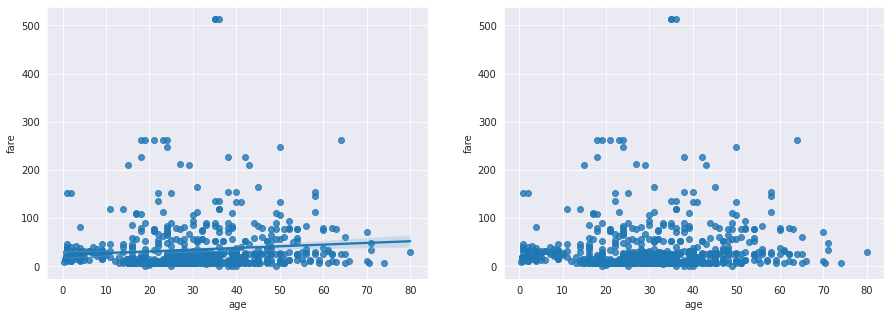

In [ ]:
# 회귀선이 있는 산점도
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='age',y='fare',data=titanic,ax=ax1)
sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


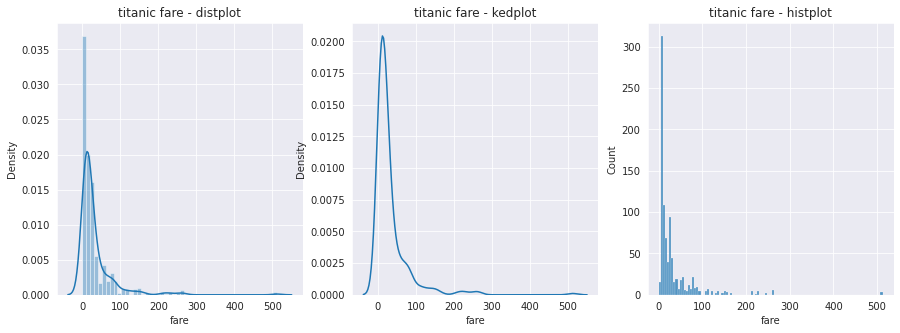

In [ ]:
# 히스토그램 / 커널 밀도 그래프

import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# distplot
sns.distplot(titanic['fare'], ax=ax1)
# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)
# histplot
sns.histplot(x='fare', data=titanic, ax=ax3)
# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')
plt.show()

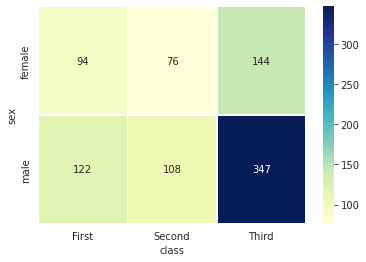

In [ ]:
# 라이브러리 불러오기 생략
# Seaborn 제공 데이터셋 가져오기 생략
# 스타일 테마 설정 생략
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
# 히트맵 그리기
sns.heatmap(table, # 데이터프레임
annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
cmap='YlGnBu', # 컬러 맵
linewidth=.5, # 구분 선
cbar=True) # 컬러 바 표시 여부
plt.show()

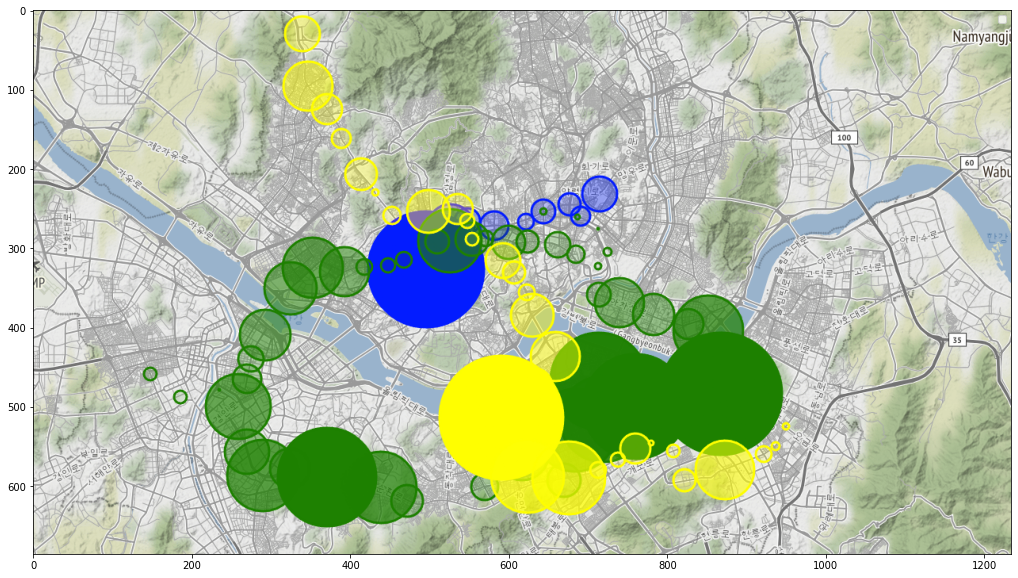

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# img_test = img.imread('/content/drive/MyDrive/4학년동계학기/1.SKT FLY AI Challenger/1주차(12.19~12.23)/Screenshot from 2022-12-21 23-52-18.png')
plt.figure(figsize=(20,10))
plt.imshow(img_test)
plt.plot(label="1호선")
plt.legend()
plt.show()

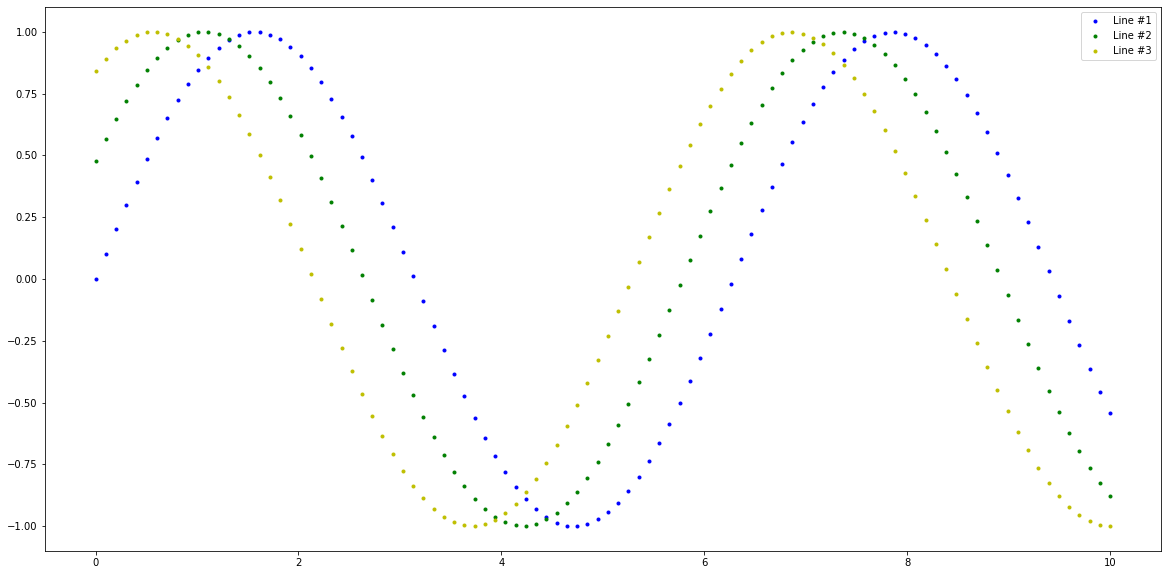

In [ ]:
import numpy as np


x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.sin(x + 0.5)
y3 = np.sin(x + 1)
plt.figure(figsize=(20,10))
plt.plot(x, y1, 'b.', label='Line #1')
plt.plot(x, y2, 'g.', label='Line #2')
plt.plot(x, y3, 'y.', label='Line #3')
plt.legend()
plt.show()